# Before your start:

    Read the README.md file
    Comment as much as you can and use the resources (README.md file)
    Happy learning!

In this exercise, we  will generate random numbers from the continuous disributions we learned in the lesson. There are two ways to generate random numbers:

1. Using the numpy library 
1. using the Scipy library 

Use either or both of the lbraries in this exercise.

## Uniform Distribution

To generate uniform random numbers between any two given values using scipy, we can either use the following code or the code that we have
discussed in class:

In [1]:
from scipy.stats import uniform
x = uniform.rvs(size=10)
a = 2
b = 3
randoms  = a + (b-a)*x
print(randoms)

[2.49993413 2.20804449 2.21137485 2.51968911 2.03706433 2.34973942
 2.96844151 2.32420533 2.96155144 2.22764885]


**Your task:**

1. Based on the code above, write a function that generates uniformly distributed random numbers. There are several requirements for your function:
    * It should accept 3 parameters: 
        * `bottom` - the lower boundary of the generated numbers
        * `ceiling` - the upper boundary of the generated numbers
        * `count` - how many numbers to generate
    * It should return an array of uniformly distributed random numbers

1. Call your function with 2 sets of params below:
    * bottom=10, ceiling=15, count=100
    * bottom=10, ceiling=60, count=1,000

1. Plot the uniform distributions generated above using histograms, where x axis is the value and y axis is the count. Let the histogram's number of bins be 10.

Your output should look like below:

![uniform distribution](ud.png)

In [17]:
def uniform_random(bottom,ceiling,count):
    x = uniform.rvs(size=count)
    a = bottom
    b = ceiling
    return a+(b-a)*x

In [18]:
first = uniform_random(10, 15, 100)
second = uniform_random(10, 60, 1000)

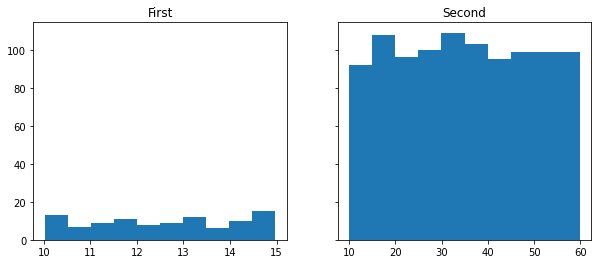

In [27]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2, figsize=(10,4), sharey= True)
plt.sca(ax[0])
plt.hist(first)
plt.title('First')

plt.sca(ax[1])
plt.hist(second)
plt.title('Second')
plt.show();

How are the two distributions different?

**`Both are uniform distributions the only thing that changes are the bottom and ceiling range and the amount of values`**

## Normal Distribution

1. In the same way in the Uniform Distribution challenge, write a function that generates normally distributed random numbers.
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 1
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 50
2. Plot the distributions of the data generated.

Expected output:

![normal distribution](nd.png)

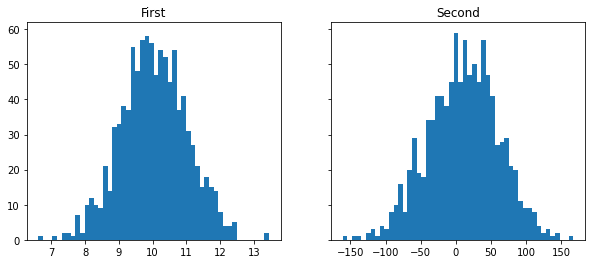

In [38]:
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html
from numpy import random
first = random.normal(10, 1, 1000) # random.normal(mean, std, size)
second = random.normal(10, 50, 1000)

fig, ax = plt.subplots(1,2, figsize=(10,4), sharey= True)
plt.sca(ax[0])
plt.hist(first,bins=50)
plt.title('First')

plt.sca(ax[1])
plt.hist(second,bins=50)
plt.title('Second')
plt.show();

How are the two distributions different?

**`Both are normal distributions but the "Second" plot is mor dispersed in the x axis`**

## Normal Distribution of Real Data

In this challenge we are going to take a look the real data. We will use vehicles.csv file for this exercise

First import vehicles.csv.

In [41]:
import pandas as pd
df = pd.read_csv('vehicles.csv')
df.columns

Index(['Make', 'Model', 'Year', 'Engine Displacement', 'Cylinders',
       'Transmission', 'Drivetrain', 'Vehicle Class', 'Fuel Type',
       'Fuel Barrels/Year', 'City MPG', 'Highway MPG', 'Combined MPG',
       'CO2 Emission Grams/Mile', 'Fuel Cost/Year'],
      dtype='object')

Then plot the histograms for the following variables:
1. Fuel Barrels/Year

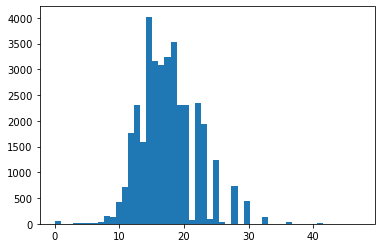

In [46]:
plt.hist(df['Fuel Barrels/Year'], bins=50);

2. CO2 Emission Grams/Mile 

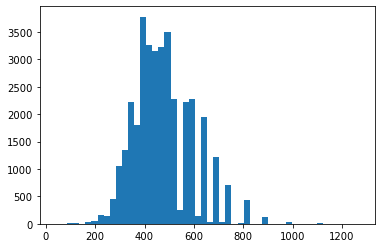

In [47]:
plt.hist(df['CO2 Emission Grams/Mile'],bins=50);

3. Combined MPG

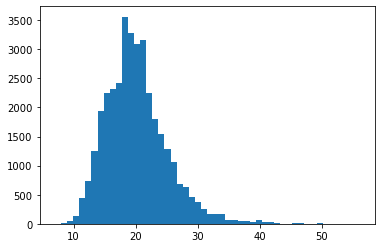

In [50]:
plt.hist(df['Combined MPG'],bins=50);

Which one(s) of the variables are nearly normally distributed? How do you know?

In [58]:
# https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/
# https://support.minitab.com/en-us/minitab-express/1/help-and-how-to/basic-statistics/summary-statistics/normality-test/interpret-the-results/key-results/#:~:text=Key%20Result%3A%20P-Value,not%20follow%20a%20normal%20distribution.

from scipy.stats import normaltest
def is_normal(stat, p, column):
    # if the p-value is < to alpha 5% the data do not follow a normal distribution
    alpha = 0.05
    if p > alpha:
        print(f'Sample {column} looks Normally Distributed')
    else:
        print(f"Sample {column} doesn't look Normally Distributed")

stat, p = normaltest(df['Fuel Barrels/Year'])
is_normal(stat, p, 'Fuel Barrels/Year')

Sample Fuel Barrels/Year doesn't look Normally Distributed


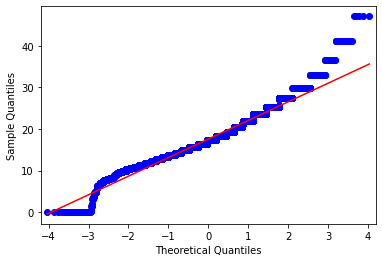

In [57]:
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
qqplot(df['Fuel Barrels/Year'], line='s')
pyplot.show()

In [59]:
stat, p = normaltest(df['CO2 Emission Grams/Mile'])
is_normal(stat, p, 'CO2 Emission Grams/Mile')

Sample CO2 Emission Grams/Mile doesn't look Normally Distributed


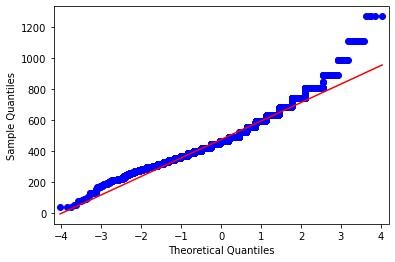

In [60]:
qqplot(df['CO2 Emission Grams/Mile'], line='s')
pyplot.show()

In [61]:
stat, p = normaltest(df['Combined MPG'])
is_normal(stat, p, 'Combined MPG')

Sample Combined MPG doesn't look Normally Distributed


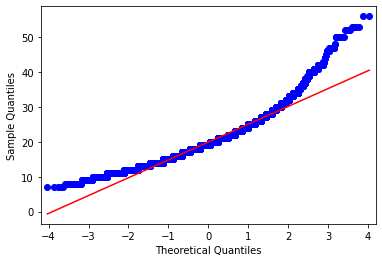

In [62]:
qqplot(df['Combined MPG'], line='s')
pyplot.show()

**`None of the three are normally distributed, all the histograms looks like are normal distribution, but the normal tests and de scatter plots tell us that those aren't gaussian distributions. But we can say they are close from a normal distribution by the look of them being the Fuel Barrels/Year and CO2 Emission Grams/Mile the closest as the blue points follow more accurately the red line`**

## Exponential Distribution

1. Using `numpy.random.exponential`, create a function that returns a list of numbers exponentially distributed with the mean of 10. 

1. Use the function to generate two number sequences with the size of 1 and 100.

1. Plot the distributions as histograms with the nubmer of bins as 100.

Your output should look like below:

![exponential distribution](ed.png)

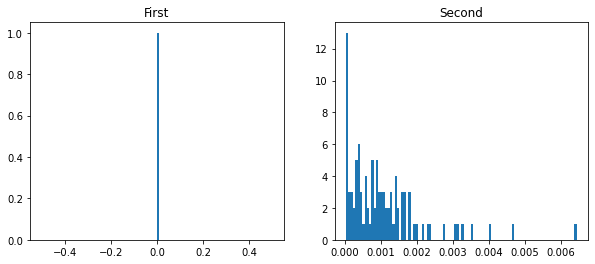

In [85]:
def exponential_random(size):
    return random.exponential(1/10,size)

first = exponential_random(1)
second = exponential_random(100)

fig, ax = plt.subplots(1,2, figsize=(10,4))
plt.sca(ax[0])
plt.hist(first,bins=100)
plt.title('First')

plt.sca(ax[1])
plt.hist(second,bins=100)
plt.title('Second')
plt.show();

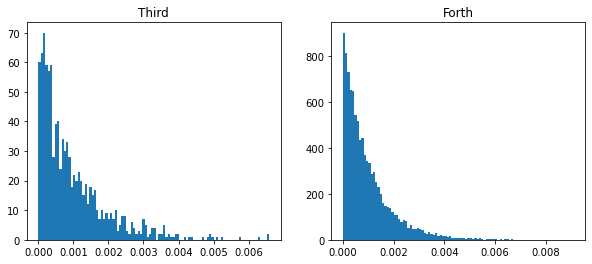

In [87]:
third = exponential_random(1000)
forth = exponential_random(10000)

fig, ax = plt.subplots(1,2, figsize=(10,4))
plt.sca(ax[0])
plt.hist(first,bins=100)
plt.title('Third')

plt.sca(ax[1])
plt.hist(second,bins=100)
plt.title('Forth')
plt.show();

How are the two distributions different?

**`On the First plot is difficult to observe an exponential distribution while in the Second is a little bit more clearly. If we increase the size is more cleary the exponential behavior`**

## Exponential Distribution of Real Data

Suppose that the amount of time one spends in a bank is exponentially distributed with mean as 10 minutes (i.e. λ = 1/10). What is the probability that a customer will spend less than fifteen minutes in the bank? 

Write a code in python to solve this problem

In [95]:
# This is same as saying P(x<15)
from scipy.stats import expon
f'{round(expon.cdf(15, scale=10)*100,2)}%' # expon.cdf(event,mean)   λ = 1/β

'77.69%'

What is the probability that the customer will spend more than 15 minutes

In [98]:
f'{round(100-expon.cdf(15, scale=10)*100,2)}%'

'22.31%'